In [71]:
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, confusion_matrix


In [72]:
try:
    train = pd.read_csv('train_black.csv')
except Exception as e:
    print('Error reading train data: %s' % e)

lr = LinearRegression()

In [127]:
def run_model(model, features, data = train, test_size = 0.2):
    X = data[features]
    Y = data['Purchase']

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=123)

    
    model.fit(X_train,y_train)
    coefficients = dict(zip(features, model.coef_))
    coefficients['Intercept'] = model.intercept_

    
    y_pred = model.predict(X_test)
    print("MAE values: ", mean_absolute_error(y_test, y_pred))
    print("MSE values: ", mean_squared_error(y_test, y_pred))
    print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 - Score: ', r2_score(y_test, y_pred))
    return coefficients, model
    


In [74]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Exploration

In [75]:
print('Shape of the training data is:', train.shape)

Shape of the training data is: (550068, 12)


In [159]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Occupation_Encoded', 'Occupation_encode_category_1',
       'Occupation_encode_category_2', 'Occupation_encode_category_3',
       'Occupation_encode_category_4', 'City_A', 'City_B', 'City_C', 'PC1',
       'PC2', 'PC3'],
      dtype='object')

In [76]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


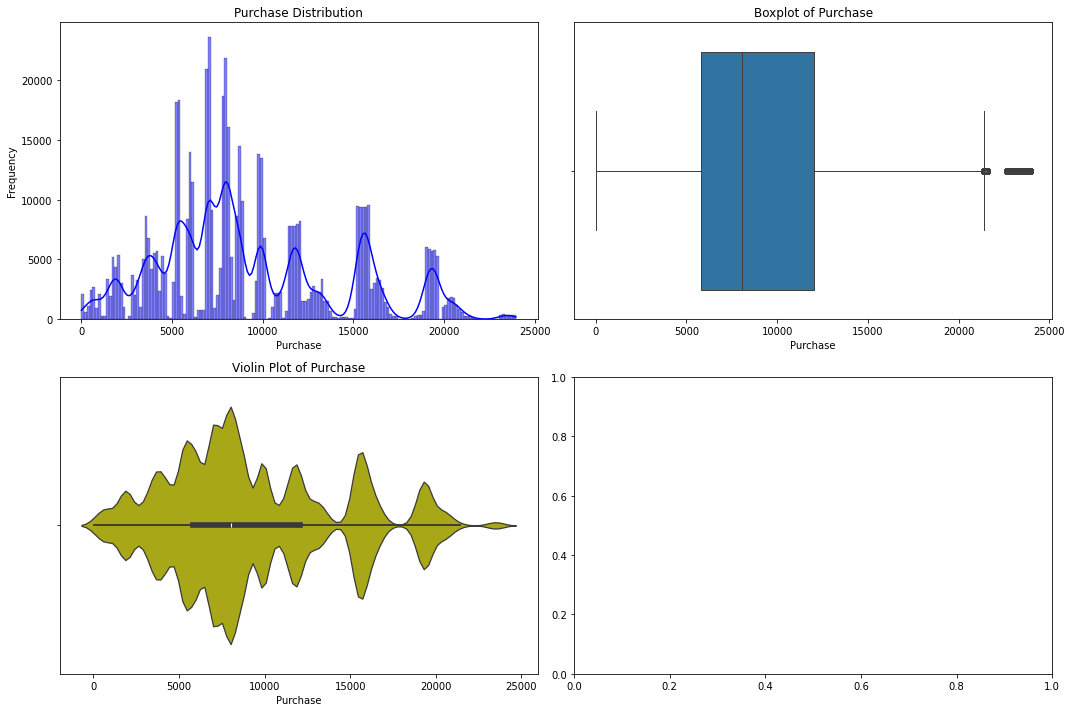

In [158]:
# Calculate summary statistics
summary_stats = train['Purchase'].describe()[['mean', '50%', 'std', 'min', 'max']]
summary_stats.index = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max']

# Transpose the summary statistics for better visibility in the table
summary_stats_df = summary_stats.to_frame().T

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# First Plot: Purchase Distribution (Histogram with KDE)
sns.histplot(train["Purchase"], color='b', kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Purchase Distribution")
axes[0, 0].set_xlabel("Purchase")
axes[0, 0].set_ylabel("Frequency")

# Second Plot: Boxplot of Purchase
sns.boxplot(x=train["Purchase"], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Purchase")
axes[0, 1].set_xlabel("Purchase")

# Third Plot: Violin Plot of Purchase
sns.violinplot(x=train["Purchase"], ax=axes[1, 0], color='y')
axes[1, 0].set_title("Violin Plot of Purchase")
axes[1, 0].set_xlabel("Purchase")

# # Fourth Plot: Summary Statistics Table
# axes[1, 1].axis('off')  # Turn off the axis
# table = axes[1, 1].table(cellText=summary_stats_df.values, colLabels=summary_stats_df.columns, rowLabels=summary_stats_df.index, loc='center', cellLoc='center', colColours=['#f5f5f5']*summary_stats_df.shape[1])
# axes[1, 1].set_title("Summary of Purchase Values", pad=20)

# Adjust layout
plt.tight_layout()
plt.show()


In [164]:
pd.DataFrame(train["Purchase"].describe())

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [80]:
# Data Summary
data_summary = []

Categorical_features = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

for col in train.columns:
    percent_null = train[col].isnull().mean()*100
    total_unique = train[col].nunique()
    total_values = train[col].count()
    # data_type = "Numerical" if pd.api.types.is_numeric_dtype(train[col]) else "Categorical"
    data_type = "Numerical" if col not in Categorical_features else "Categorical"

    data_summary.append([col, data_type, total_unique,  percent_null, total_values])

data_summary = pd.DataFrame(data_summary, columns = ['Feature Name', 'Data_type', 'Unique_values', '% of null values', 'Total values'])
data_summary

,Feature Name,Data_type,Unique_values,% of null values,Total values
0,User_ID,Categorical,5891,0.000000,550068
1,Product_ID,Categorical,3631,0.000000,550068
2,Gender,Categorical,2,0.000000,550068
3,Age,Categorical,7,0.000000,550068
4,Occupation,Categorical,21,0.000000,550068
5,City_Category,Categorical,3,0.000000,550068
6,Stay_In_Current_City_Years,Numerical,5,0.000000,550068
7,Marital_Status,Categorical,2,0.000000,550068
8,Product_Category_1,Categorical,20,0.000000,550068
9,Product_Category_2,Categorical,17,31.566643,376430


## Gender and Marital Status

In [165]:
# print(train.groupby("Gender").mean()["Purchase"])
print(train.groupby(by = ["Marital_Status", 'Gender'])["Purchase"].mean())
pd.pivot_table(train, index = 'Gender', columns='Marital_Status', values  = 'Purchase', aggfunc={'Purchase':np.mean})

Marital_Status  Gender
0               0         8679.845815
                1         9453.756740
1               0         8810.249789
                1         9413.817605
Name: Purchase, dtype: float64


/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_89905/3116448830.py:3: FutureWarning: The provided callable <function mean at 0x107db53a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(train, index = 'Gender', columns='Marital_Status', values  = 'Purchase', aggfunc={'Purchase':np.mean})


Marital_Status,0,1
Gender,,
0,8679.845815,8810.249789
1,9453.756740,9413.817605


Text(525.2340909090908, 0.5, 'Gender')

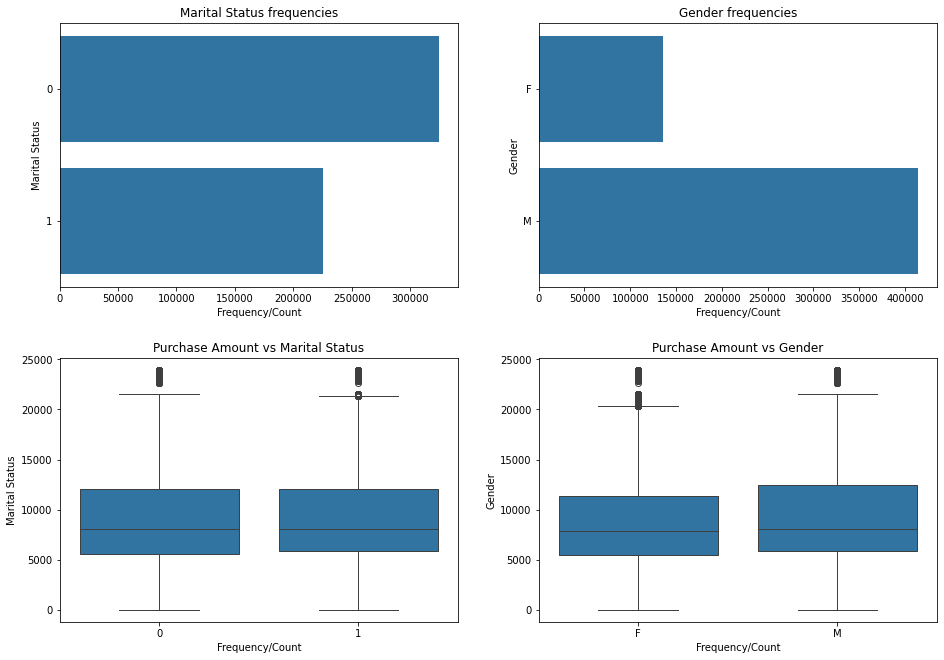

In [82]:
# Analysis on Gender, Marital Status

fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.tight_layout(pad=5.0)

# Horizontal bar chart for Marital Status
sns.countplot(data = train, y = 'Marital_Status', ax = axes[0,0])
axes[0,0].set_title('Marital Status frequencies')
axes[0,0].set_xlabel('Frequency/Count')
axes[0,0].set_ylabel('Marital Status')

# Horizontal bar chart for Marital Status
sns.countplot(data = train, y = 'Gender', ax = axes[0,1])
axes[0,1].set_title('Gender frequencies')
axes[0,1].set_xlabel('Frequency/Count')
axes[0,1].set_ylabel('Gender')

# Horizontal bar chart for Marital Status
sns.boxplot(data = train, x = 'Marital_Status', y = 'Purchase', ax = axes[1,0])
axes[1,0].set_title('Purchase Amount vs Marital Status')
axes[1,0].set_xlabel('Frequency/Count')
axes[1,0].set_ylabel('Marital Status')


# Horizontal bar chart for Marital Status
sns.boxplot(data = train, x = 'Gender', y = 'Purchase', ax = axes[1,1])
axes[1,1].set_title('Purchase Amount vs Gender')
axes[1,1].set_xlabel('Frequency/Count')
axes[1,1].set_ylabel('Gender')

<Axes: xlabel='None', ylabel='Purchase'>

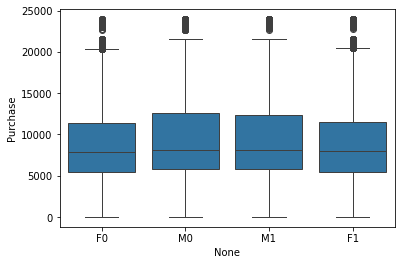

In [83]:
# Combine Marital Status and Gender and draw box plot
sns.boxplot(x = train['Gender'] + train['Marital_Status'].astype(str), y= train['Purchase'])

In [84]:
train['Gender'] = train['Gender'].replace({'M':1, 'F':0})
run_model(lr, ['Gender', 'Marital_Status'], train)

MAE values:  4063.0218712042188
MSE values:  25200695.206492167
R2 - Score:  0.003718152791091889
RMSE of Linear Regression Model is  5020.02940295096


/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_89905/4112956801.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Gender'] = train['Gender'].replace({'M':1, 'F':0})


({'Gender': np.float64(700.9492445004495),
  'Marital_Status': np.float64(0.9694810405830218),
  'Intercept': np.float64(8739.214196434577)},
 LinearRegression())

## Occupations

In [168]:
occup = pd.DataFrame(train.groupby("Occupation")["Purchase"].mean()).reset_index()
# Sort the data by 'Purchase' and encode the index
occup = occup.sort_values(by='Purchase')
occup['Encoded_Values'] = dict(zip(occup.index, list(range(0, len(occup)))))
occup

,Occupation,Purchase,Encoded_Values
9,9,8637.743761,0
19,19,8710.627231,1
20,20,8836.494905,2
2,2,8952.481683,3
1,1,8953.193270,4
10,10,8959.355375,5
0,0,9124.428588,6
18,18,9169.655844,7
3,3,9178.593088,8
11,11,9213.845848,9


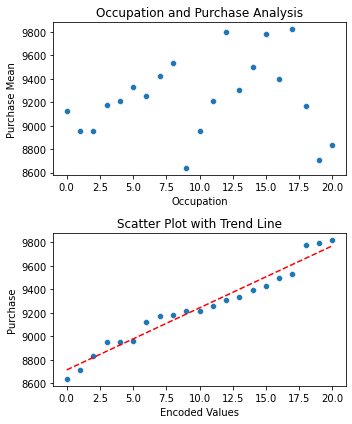

MAE values:  4062.4422524810884
MSE values:  25194776.187321298
RMSE of Linear Regression Model is  5019.439828040705
R2 - Score:  0.003952154722582146


({'Gender': np.float64(682.4088104089237),
  'Marital_Status': np.float64(-2.6418509064289655),
  'Occupation': np.float64(10.435347707378893),
  'Intercept': np.float64(8670.40059272056)},
 LinearRegression())

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Group by 'Occupation' and calculate the mean 'Purchase'
occup = pd.DataFrame(train.groupby("Occupation")["Purchase"].mean()).reset_index()

# Create subplots for side-by-side plots
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# First Scatter Plot: Occupation vs Purchase Mean
sns.scatterplot(data=occup, x='Occupation', y='Purchase', ax=axes[0])
axes[0].set_title("Occupation and Purchase Analysis")
axes[0].set_xlabel("Occupation")
axes[0].set_ylabel("Purchase Mean")

# Sort the data by 'Purchase' and encode the index
occup = occup.sort_values(by='Purchase')
occup['Encoded_Values'] = dict(zip(occup.index, list(range(0, len(occup)))))

# Second Scatter Plot: Encoded Values vs Purchase with Trend Line
sns.scatterplot(data=occup, x='Encoded_Values', y='Purchase', ax=axes[1])

# Calculate the trend line
z = np.polyfit(occup['Encoded_Values'], occup['Purchase'], 1)
p = np.poly1d(z)

# Plot the trend line
axes[1].plot(occup['Encoded_Values'], p(occup['Encoded_Values']), "r--")
axes[1].set_title('Scatter Plot with Trend Line')
axes[1].set_xlabel('Encoded Values')
axes[1].set_ylabel('Purchase')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Reassign encoded values to the original dictionary
occup = dict(zip(occup.index, list(range(0, len(occup)))))

# Run the model
run_model(lr, ['Gender', 'Marital_Status', 'Occupation'], train)

In [88]:
# Encode Occupation Information
train['Occupation_Encoded'] = train['Occupation'].apply(lambda x: occup[x],1)
run_model(lr, ['Gender', 'Marital_Status', 'Occupation_Encoded'], train)

MAE values:  4054.568692357184
MSE values:  25134042.47854415
R2 - Score:  0.006353195292000957
RMSE of Linear Regression Model is  5013.38632847541


/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_89905/2383904446.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  train['Occupation_Encoded'] = train['Occupation'].apply(lambda x: occup[x],1)


({'Gender': np.float64(600.8804394123259),
  'Marital_Status': np.float64(-8.895265953217859),
  'Occupation_Encoded': np.float64(42.22057176657667),
  'Intercept': np.float64(8386.101875009515)},
 LinearRegression())

## City

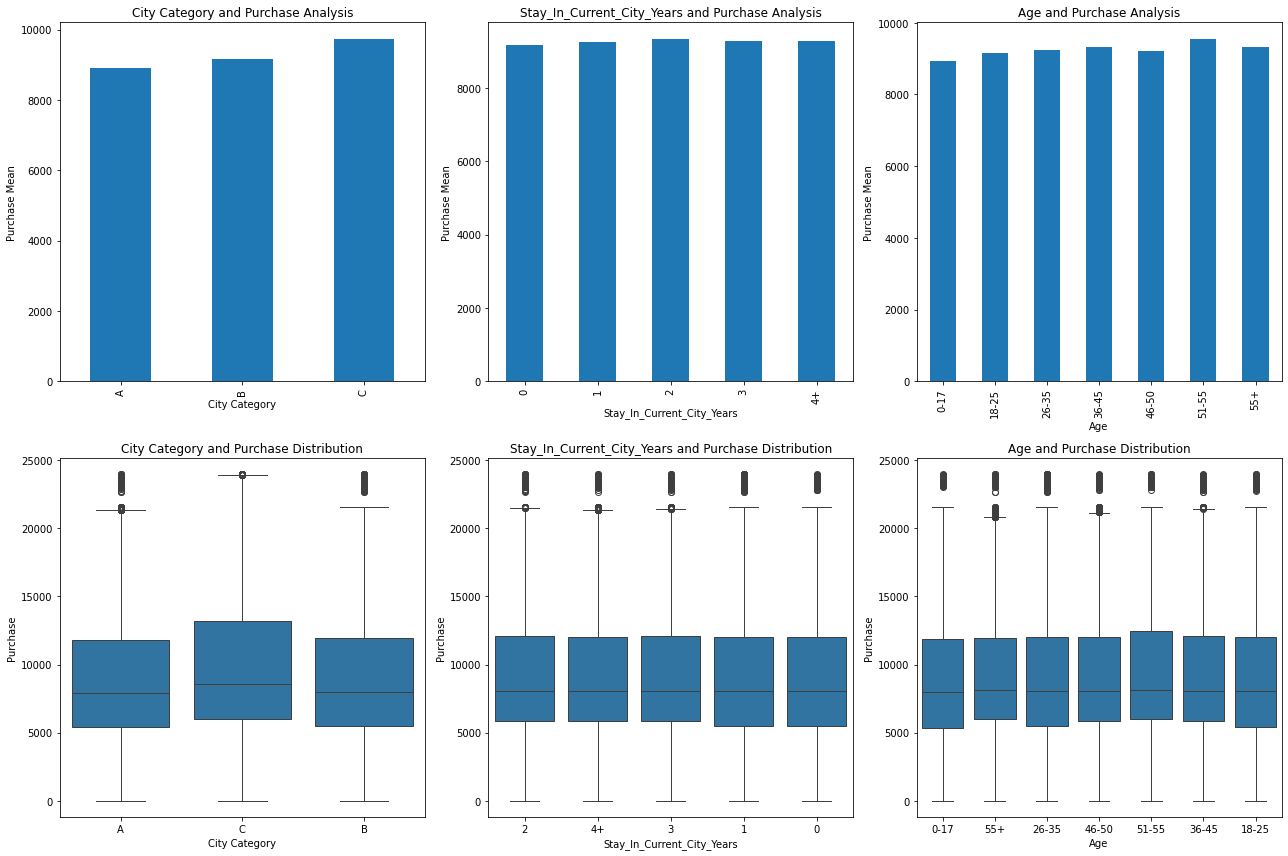

In [145]:
# Create a 3x2 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Bar Plot: City Category vs Purchase Mean
train.groupby("City_Category")["Purchase"].mean().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("City Category and Purchase Analysis")
axes[0, 0].set_xlabel("City Category")
axes[0, 0].set_ylabel("Purchase Mean")

# Bar Plot: Stay_In_Current_City_Years vs Purchase Mean
train.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Stay_In_Current_City_Years and Purchase Analysis")
axes[0, 1].set_xlabel("Stay_In_Current_City_Years")
axes[0, 1].set_ylabel("Purchase Mean")

# Bar Plot: Age vs Purchase Mean
train.groupby("Age")["Purchase"].mean().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title("Age and Purchase Analysis")
axes[0, 2].set_xlabel("Age")
axes[0, 2].set_ylabel("Purchase Mean")

# Box Plot: City Category vs Purchase
sns.boxplot(x="City_Category", y="Purchase", data=train, ax=axes[1, 0])
axes[1, 0].set_title("City Category and Purchase Distribution")
axes[1, 0].set_xlabel("City Category")
axes[1, 0].set_ylabel("Purchase")

# Box Plot: Stay_In_Current_City_Years vs Purchase
sns.boxplot(x="Stay_In_Current_City_Years", y="Purchase", data=train, ax=axes[1, 1])
axes[1, 1].set_title("Stay_In_Current_City_Years and Purchase Distribution")
axes[1, 1].set_xlabel("Stay_In_Current_City_Years")
axes[1, 1].set_ylabel("Purchase")

# Box Plot: Age vs Purchase
sns.boxplot(x="Age", y="Purchase", data=train, ax=axes[1, 2])
axes[1, 2].set_title("Age and Purchase Distribution")
axes[1, 2].set_xlabel("Age")
axes[1, 2].set_ylabel("Purchase")

# Adjust layout
plt.tight_layout()
plt.show()


In [146]:
# Encode City Information
train['City_A'] = train['City_Category'].apply(lambda x: 1 if x == 'A' else 0, 1)
train['City_B'] = train['City_Category'].apply(lambda x: 1 if x == 'B' else 0, 1)
train['City_C'] = train['City_Category'].apply(lambda x: 1 if x == 'C' else 0, 1)

run_model(lr, ['Gender', 'Marital_Status', 'Occupation_Encoded', 'City_A', 'City_B'], train)

/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_89905/1808391504.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  train['City_A'] = train['City_Category'].apply(lambda x: 1 if x == 'A' else 0, 1)
/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_89905/1808391504.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  train['City_B'] = train['City_Category'].apply(lambda x: 1 if x == 'B' else 0, 1)
/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_89905/1808391504.py:4: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  train['City_C'] = train['City_Category'].apply(lam

MAE values:  4042.5746515046235
MSE values:  25033914.095530294
RMSE of Linear Regression Model is  5003.39026016663
R2 - Score:  0.010311661102951453


({'Gender': np.float64(611.5213080773733),
  'Marital_Status': np.float64(-31.436074532596614),
  'Occupation_Encoded': np.float64(38.54531059176657),
  'City_A': np.float64(-765.4578391681538),
  'City_B': np.float64(-541.8126182527024),
  'Intercept': np.float64(8858.2226752785)},
 LinearRegression())

## Product Category

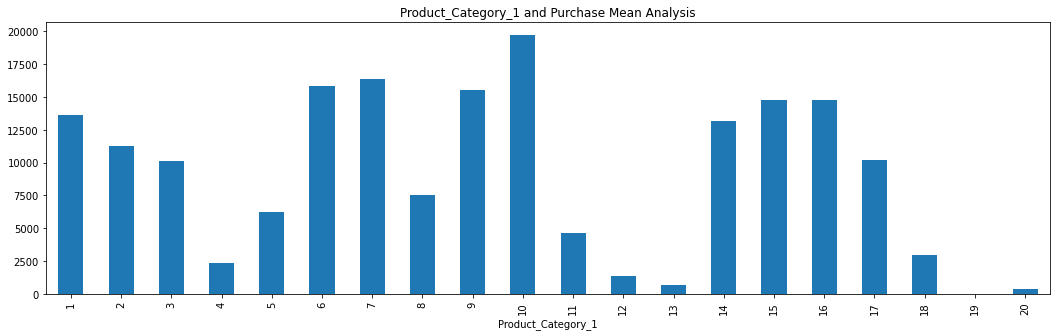

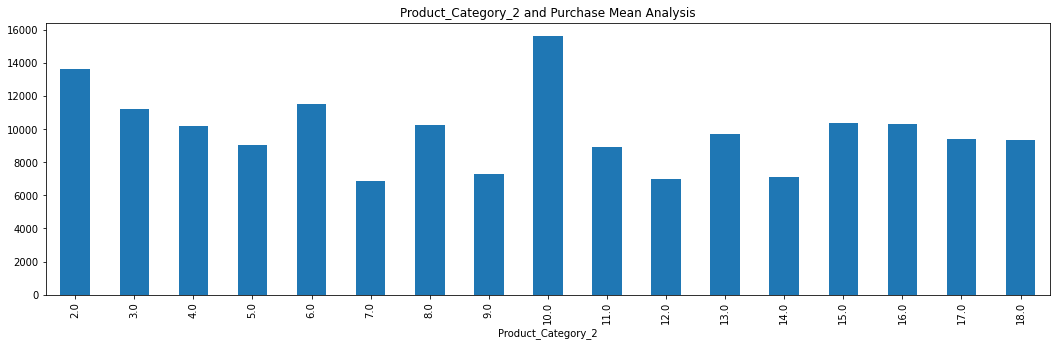

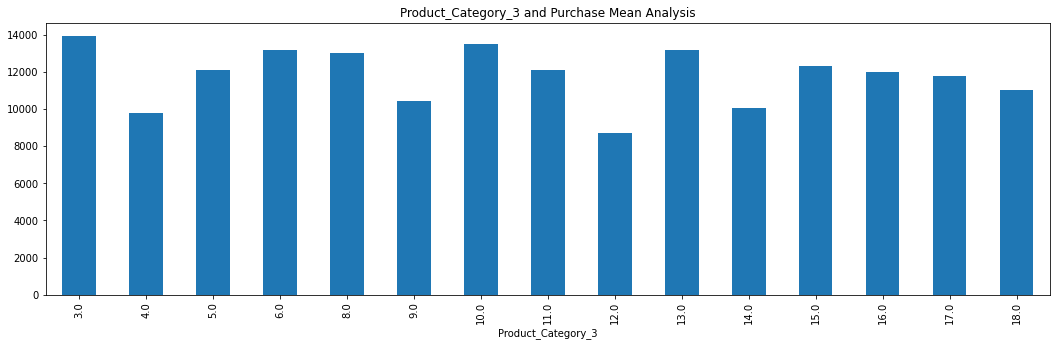

In [99]:
train.groupby('Product_Category_1')['Purchase'].mean().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

train.groupby('Product_Category_2')['Purchase'].mean().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_2 and Purchase Mean Analysis")
plt.show()

train.groupby('Product_Category_3')['Purchase'].mean().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_3 and Purchase Mean Analysis")
plt.show()

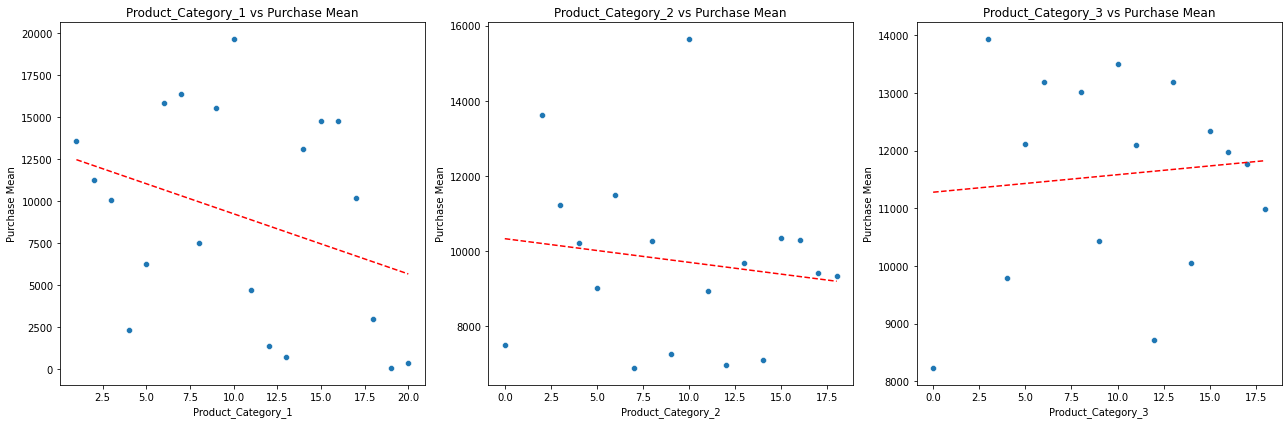

MAE values:  3538.7880004441345
MSE values:  21574992.90605212
RMSE of Linear Regression Model is  4644.888901368053
R2 - Score:  0.1470563169057637


({'Product_Category_1': np.float64(-347.1153248190873),
  'Product_Category_2': np.float64(14.046187844051104),
  'Product_Category_3': np.float64(146.27542304888522),
  'Intercept': np.float64(10486.879357731246)},
 LinearRegression())

In [138]:
# Filling Null values
train['Product_Category_1'] = train['Product_Category_1'].fillna(0)
train['Product_Category_2'] = train['Product_Category_2'].fillna(0)
train['Product_Category_3'] = train['Product_Category_3'].fillna(0)

# Create DataFrames
PC1 = pd.DataFrame(train.groupby('Product_Category_1')['Purchase'].mean()).reset_index()
PC2 = pd.DataFrame(train.groupby('Product_Category_2')['Purchase'].mean()).reset_index()
PC3 = pd.DataFrame(train.groupby('Product_Category_3')['Purchase'].mean()).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PC1 Scatter Plot
sns.scatterplot(data=PC1, x='Product_Category_1', y='Purchase', ax=axes[0])
# Add trend line
z = np.polyfit(PC1['Product_Category_1'], PC1['Purchase'], 1)
p = np.poly1d(z)
axes[0].plot(PC1['Product_Category_1'], p(PC1['Product_Category_1']), "r--")
axes[0].set_title('Product_Category_1 vs Purchase Mean')
axes[0].set_xlabel('Product_Category_1')
axes[0].set_ylabel('Purchase Mean')

# PC2 Scatter Plot
sns.scatterplot(data=PC2, x='Product_Category_2', y='Purchase', ax=axes[1])
# Add trend line
z = np.polyfit(PC2['Product_Category_2'], PC2['Purchase'], 1)
p = np.poly1d(z)
axes[1].plot(PC2['Product_Category_2'], p(PC2['Product_Category_2']), "r--")
axes[1].set_title('Product_Category_2 vs Purchase Mean')
axes[1].set_xlabel('Product_Category_2')
axes[1].set_ylabel('Purchase Mean')

# PC3 Scatter Plot
sns.scatterplot(data=PC3, x='Product_Category_3', y='Purchase', ax=axes[2])
# Add trend line
z = np.polyfit(PC3['Product_Category_3'], PC3['Purchase'], 1)
p = np.poly1d(z)
axes[2].plot(PC3['Product_Category_3'], p(PC3['Product_Category_3']), "r--")
axes[2].set_title('Product_Category_3 vs Purchase Mean')
axes[2].set_xlabel('Product_Category_3')
axes[2].set_ylabel('Purchase Mean')

# Adjust layout
plt.tight_layout()
plt.show()

# Run the model
run_model(lr, ['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], train)


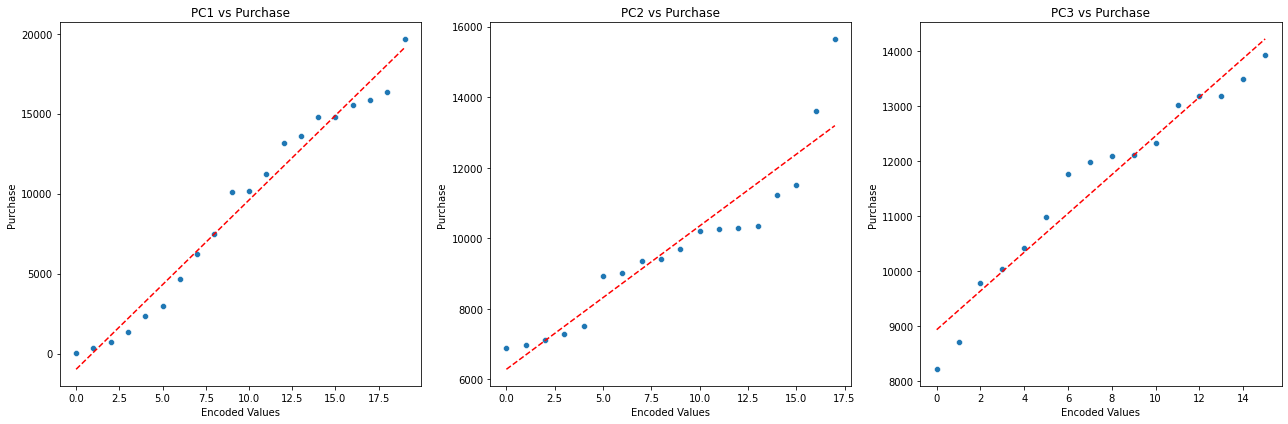

MAE values:  2351.920662958276
MSE values:  9459625.031799028
RMSE of Linear Regression Model is  3075.650342902949
R2 - Score:  0.6260240988051613


({'PC1': np.float64(1087.4498472565333),
  'PC2': np.float64(35.31371057613401),
  'PC3': np.float64(45.457690301674084),
  'Intercept': np.float64(-1485.5919883904444)},
 LinearRegression())

In [137]:
# Encoding Product Categories

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PC1
PC1 = PC1.sort_values(by='Purchase')
PC1['Encoded_Values'] = dict(zip(PC1.index, list(range(0, len(PC1)))))
sns.scatterplot(PC1, x='Encoded_Values', y='Purchase', ax=axes[0])
# Add trend line
z = np.polyfit(PC1['Encoded_Values'], PC1['Purchase'], 1)
p = np.poly1d(z)
axes[0].plot(PC1['Encoded_Values'], p(PC1['Encoded_Values']), "r--")
axes[0].set_title('PC1 vs Purchase')
axes[0].set_xlabel('Encoded Values')
axes[0].set_ylabel('Purchase')
PC1 = dict(zip(PC1.index, list(range(0, len(PC1)))))

# PC2
PC2 = PC2.sort_values(by='Purchase')
PC2['Encoded_Values'] = dict(zip(PC2.index, list(range(0, len(PC2)))))
sns.scatterplot(PC2, x='Encoded_Values', y='Purchase', ax=axes[1])
# Add trend line
z = np.polyfit(PC2['Encoded_Values'], PC2['Purchase'], 1)
p = np.poly1d(z)
axes[1].plot(PC2['Encoded_Values'], p(PC2['Encoded_Values']), "r--")
axes[1].set_title('PC2 vs Purchase')
axes[1].set_xlabel('Encoded Values')
axes[1].set_ylabel('Purchase')
PC2 = dict(zip(PC2.index, list(range(0, len(PC2)))))

# PC3
PC3 = PC3.sort_values(by='Purchase')
PC3['Encoded_Values'] = dict(zip(PC3.index, list(range(0, len(PC3)))))
sns.scatterplot(PC3, x='Encoded_Values', y='Purchase', ax=axes[2])
# Add trend line
z = np.polyfit(PC3['Encoded_Values'], PC3['Purchase'], 1)
p = np.poly1d(z)
axes[2].plot(PC3['Encoded_Values'], p(PC3['Encoded_Values']), "r--")
axes[2].set_title('PC3 vs Purchase')
axes[2].set_xlabel('Encoded Values')
axes[2].set_ylabel('Purchase')
PC3 = dict(zip(PC3.index, list(range(0, len(PC3)))))

# Adjust layout
plt.tight_layout()
plt.show()

# Mapping encoded values back to train dataset
train['PC1'] = train['Product_Category_1'].apply(lambda x: PC1.get(x, 0))
train['PC2'] = train['Product_Category_2'].apply(lambda x: PC2.get(x, 0))
train['PC3'] = train['Product_Category_3'].apply(lambda x: PC3.get(x, 0))

# Run the model
run_model(lr, ['PC1', 'PC2', 'PC3'], train)


In [134]:
run_model(lr, ['Gender', 'Marital_Status', 'Occupation_Encoded', 'City_A', 'City_B', 'PC1', 'PC2', 'PC3'], train)

MAE values:  2334.151185711962
MSE values:  9380440.64994948
RMSE of Linear Regression Model is  3062.7505040321976
R2 - Score:  0.6291545664995144


({'Gender': np.float64(-81.33037491489854),
  'Marital_Status': np.float64(7.772880297312099),
  'Occupation_Encoded': np.float64(18.587846169493332),
  'City_A': np.float64(-595.5474984829617),
  'City_B': np.float64(-442.4108170255009),
  'PC1': np.float64(1087.7920741285675),
  'PC2': np.float64(33.61813874715871),
  'PC3': np.float64(43.269059252546406),
  'Intercept': np.float64(-1257.0357465751986)},
 LinearRegression())